In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os

# Get the directory of the current notebook
current_dir = os.path.dirname(os.path.abspath('../scripts')) 

# Add the 'scripts' directory to the Python path
scripts_dir = os.path.join(current_dir, 'scripts')
sys.path.append(scripts_dir)

In [3]:
from EDA import download_stock_data

In [4]:
tm_short_data = download_stock_data("TM", "1mo", "2m")

[*********************100%***********************]  1 of 1 completed


In [5]:
tm_short_data.head()

Price,Close,High,Low,Open,Volume
Ticker,TM,TM,TM,TM,TM
Datetime,,,,,
2024-12-09 14:30:00+00:00,176.610001,176.610001,176.210007,176.350006,11331
2024-12-09 14:32:00+00:00,177.149994,177.149994,176.260101,176.260101,4281
2024-12-09 14:34:00+00:00,176.869995,177.059906,176.869995,176.934998,2329
2024-12-09 14:36:00+00:00,176.839996,176.999298,176.700104,176.990005,1558
2024-12-09 14:38:00+00:00,176.889999,176.889999,176.889999,176.889999,207


In [6]:
tm_short_data.shape

(3626, 5)

In [7]:
tm_short_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3626 entries, 2024-12-09 14:30:00+00:00 to 2025-01-08 20:58:00+00:00
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   (Close, TM)   3626 non-null   float64
 1   (High, TM)    3626 non-null   float64
 2   (Low, TM)     3626 non-null   float64
 3   (Open, TM)    3626 non-null   float64
 4   (Volume, TM)  3626 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 170.0 KB


In [8]:
tm_short_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,TM,TM,TM,TM,TM
count,3626.000000,3626.000000,3626.000000,3626.000000,3626.000000
mean,185.194554,185.247843,185.139096,185.194976,2554.813293
std,9.172306,9.186512,9.160805,9.173264,4868.909285
min,173.350006,173.520004,173.320007,173.390106,100.000000
25%,176.876251,176.931149,176.823250,176.882504,815.000000
50%,179.737503,179.754997,179.693855,179.720001,1485.000000
75%,194.297848,194.358749,194.227497,194.289993,2674.750000
max,200.866394,200.999893,200.710007,200.830994,135169.000000


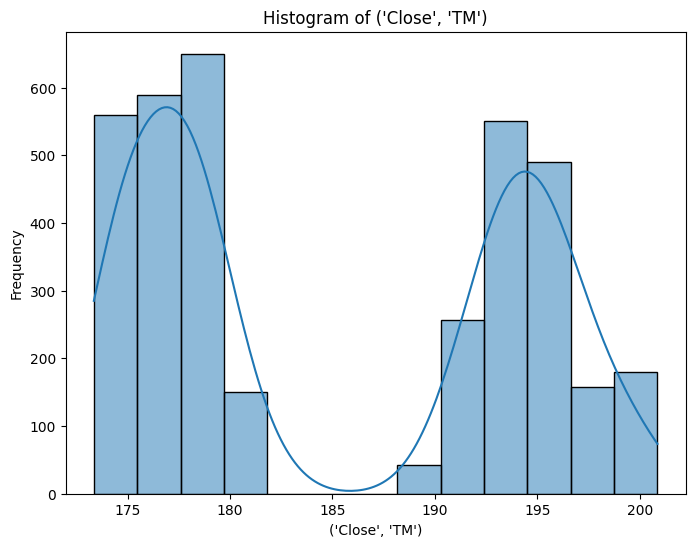

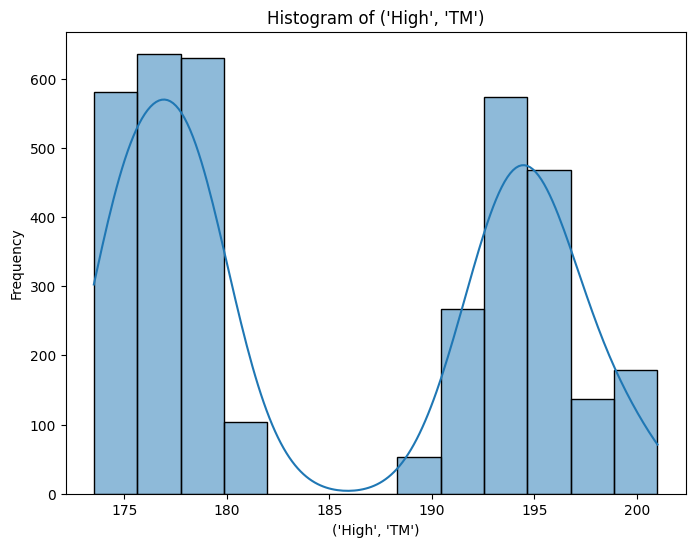

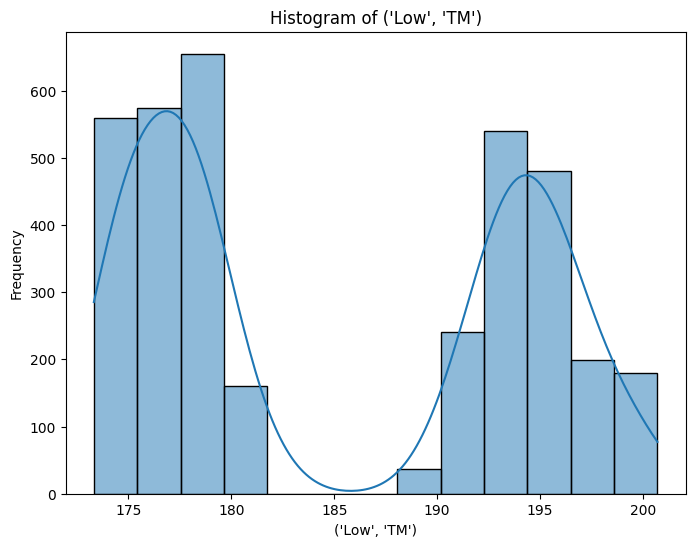

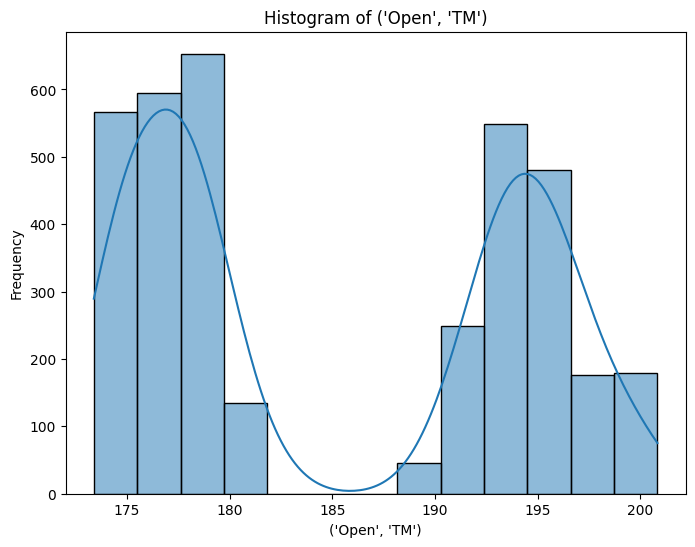

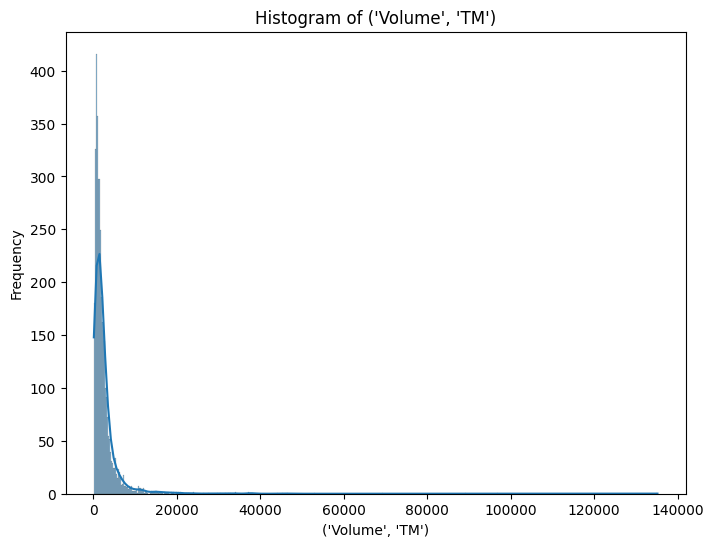

In [14]:
# Identify numerical columns
numerical_columns = tm_short_data.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(tm_short_data[column].unique()) > 10:  # Assuming if unique values > 10, consider it continuous
        plt.figure(figsize=(8, 6))
        sns.histplot(tm_short_data[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:  # For discrete or ordinal variables
        plt.figure(figsize=(8, 6))
        ax = sns.countplot(x=column, data=tm_short_data)
        plt.title(f'Count of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        
        # Annotate each bar with its count
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha = 'center', va = 'center', 
                        xytext = (0, 5), 
                        textcoords = 'offset points')
        plt.show()


In [15]:
correlation_matrix = tm_short_data.corr()

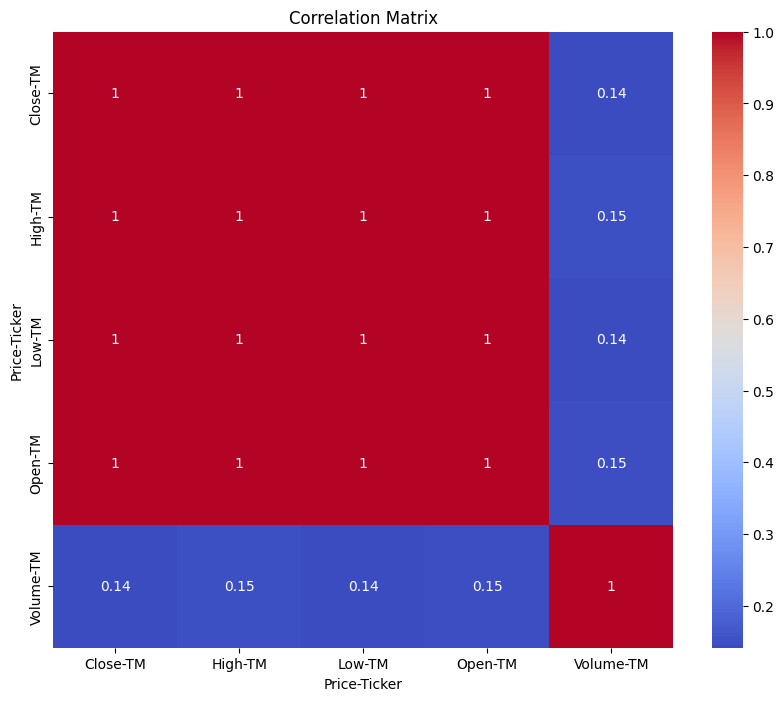

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

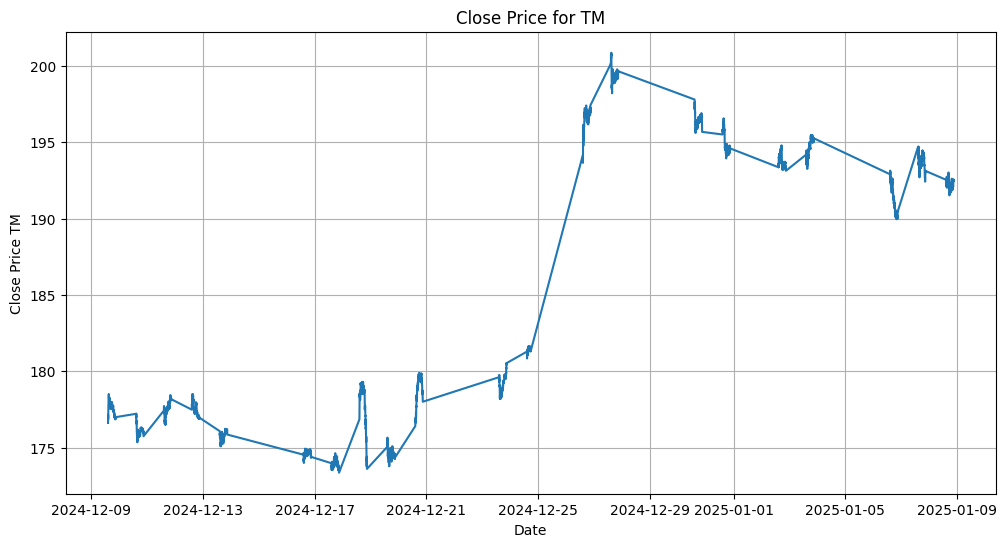

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(tm_short_data.index, tm_short_data['Close'])
plt.title(f'Close Price for TM')
plt.xlabel('Date')
plt.ylabel('Close Price TM')
plt.grid(True)
plt.show()

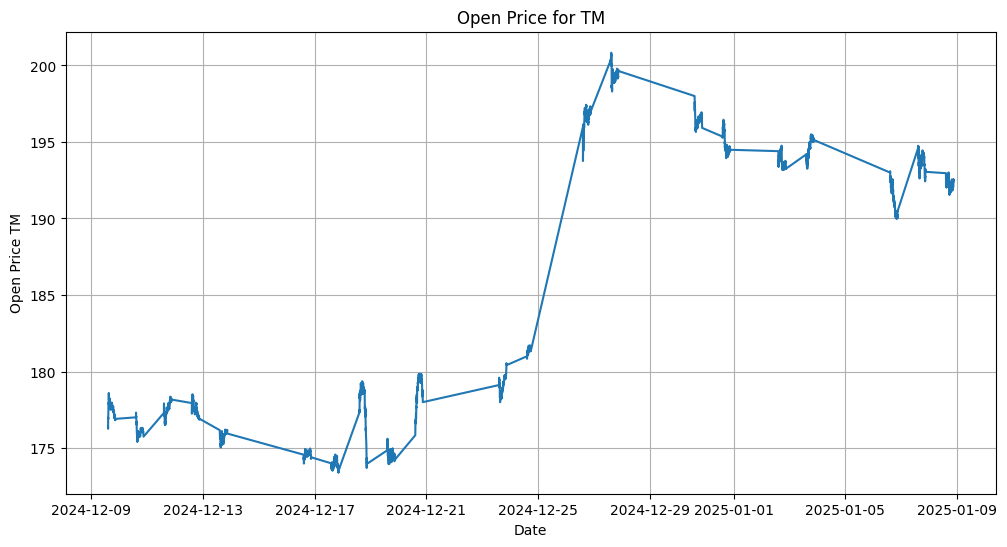

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(tm_short_data.index, tm_short_data['Open'])
plt.title(f'Open Price for TM')
plt.xlabel('Date')
plt.ylabel('Open Price TM')
plt.grid(True)
plt.show()

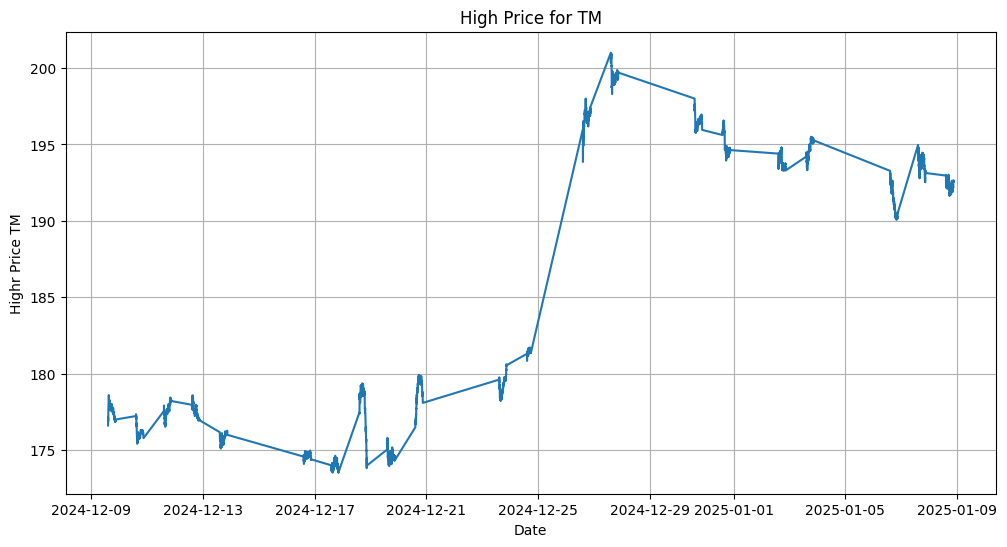

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(tm_short_data.index, tm_short_data['High'])
plt.title(f'High Price for TM')
plt.xlabel('Date')
plt.ylabel('Highr Price TM')
plt.grid(True)
plt.show()

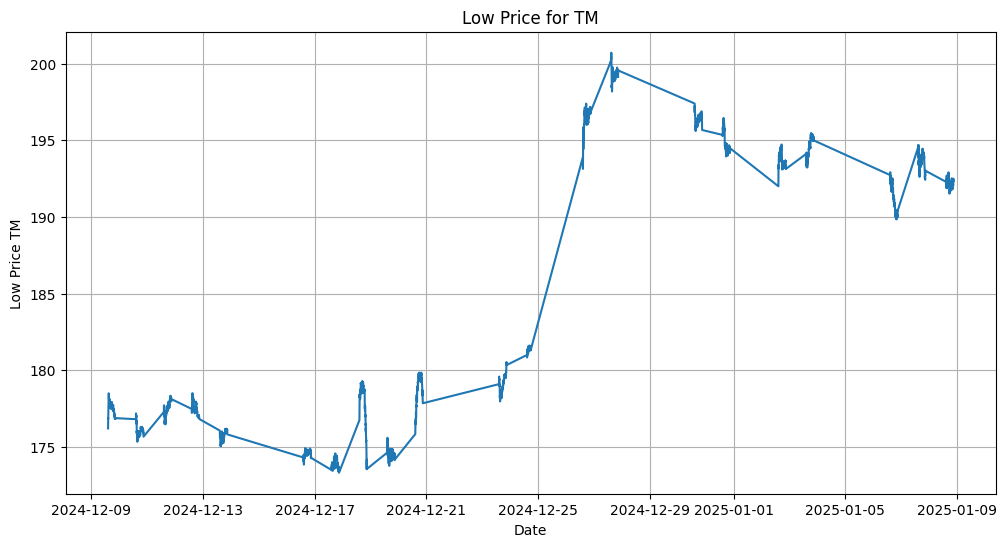

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(tm_short_data.index, tm_short_data['Low'])
plt.title(f'Low Price for TM')
plt.xlabel('Date')
plt.ylabel('Low Price TM')
plt.grid(True)
plt.show()

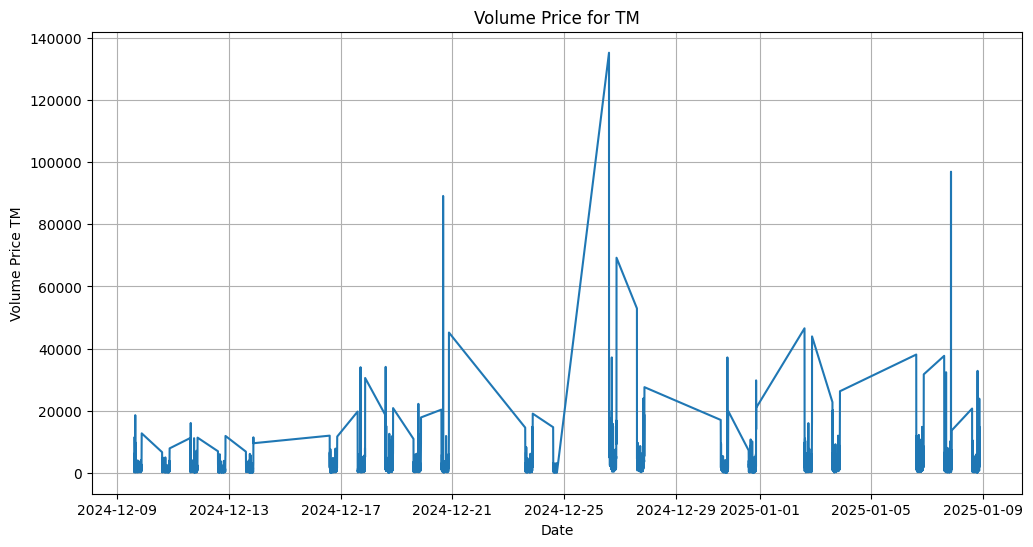

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(tm_short_data.index, tm_short_data['Volume'])
plt.title(f'Volume Price for TM')
plt.xlabel('Date')
plt.ylabel('Volume Price TM')
plt.grid(True)
plt.show()